In [1]:
pip install pandas numpy scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [5]:
# Load data
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")

print("Train Shape:", train_df.shape)
print("Test Shape:", test_df.shape)

/tmp/ipython-input-2783643286.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv("./data/train.csv")


Train Shape: (100000, 28)
Test Shape: (50000, 27)


In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Target encode: Credit_Score
print("Unique values in Credit_Score BEFORE cleaning:")
print(train_df["Credit_Score"].unique())

score_mapping = {"Poor": 0, "Standard": 1, "Good": 2}
train_df["Credit_Score"] = train_df["Credit_Score"].map(score_mapping)

print("Unique values in Credit_Score AFTER cleaning:")
print(train_df["Credit_Score"].unique())

Unique values in Credit_Score BEFORE cleaning:
['Good' 'Standard' 'Poor']
Unique values in Credit_Score AFTER cleaning:
[2 1 0]


In [8]:
# Drop ID columns if present
id_cols = [col for col in ["ID", "Customer_ID", "Name"] if col in train_df.columns]
if id_cols:
    print("Dropping ID columns:", id_cols)
    train_df = train_df.drop(columns=id_cols, errors="ignore")
    test_df = test_df.drop(columns=id_cols, errors="ignore")

Dropping ID columns: ['ID', 'Customer_ID', 'Name']


In [15]:
# --- Handle categorical encoding ---
all_data = pd.concat([train_df.drop(columns=["Credit_Score"]), test_df], axis=0)

cat_cols = all_data.select_dtypes(include=["object"]).columns
print("Categorical columns:", cat_cols.tolist())

encoder = LabelEncoder()
for col in cat_cols:
    all_data[col] = encoder.fit_transform(all_data[col].astype(str))

Categorical columns: ['Month', 'Age', 'SSN', 'Occupation', 'Annual_Income', 'Num_of_Loan', 'Type_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix', 'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance']


In [16]:
# Split back into train & test
train_features = all_data.iloc[:len(train_df)]
test_features = all_data.iloc[len(train_df):]

X = train_features
y = train_df["Credit_Score"]

In [17]:
# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [18]:

# Train model
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [19]:
# Predictions
y_pred = model.predict(X_val)

In [20]:
# Evaluation
print("\nAccuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))


Accuracy: 0.7847

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.78      5799
           1       0.80      0.81      0.80     10635
           2       0.74      0.71      0.72      3566

    accuracy                           0.78     20000
   macro avg       0.77      0.77      0.77     20000
weighted avg       0.78      0.78      0.78     20000



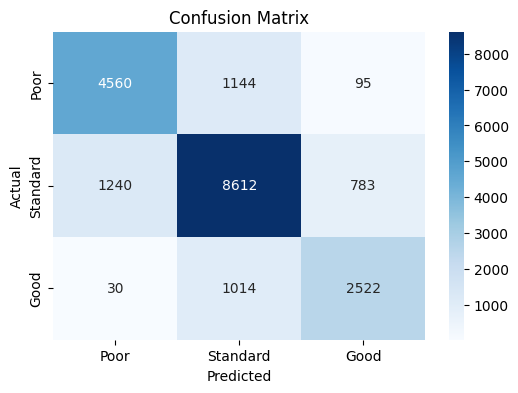

In [21]:
# Confusion Matrix heatmap
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=score_mapping.keys(),
            yticklabels=score_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

/tmp/ipython-input-4114255656.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices][:15], y=X.columns[indices][:15], palette="viridis")


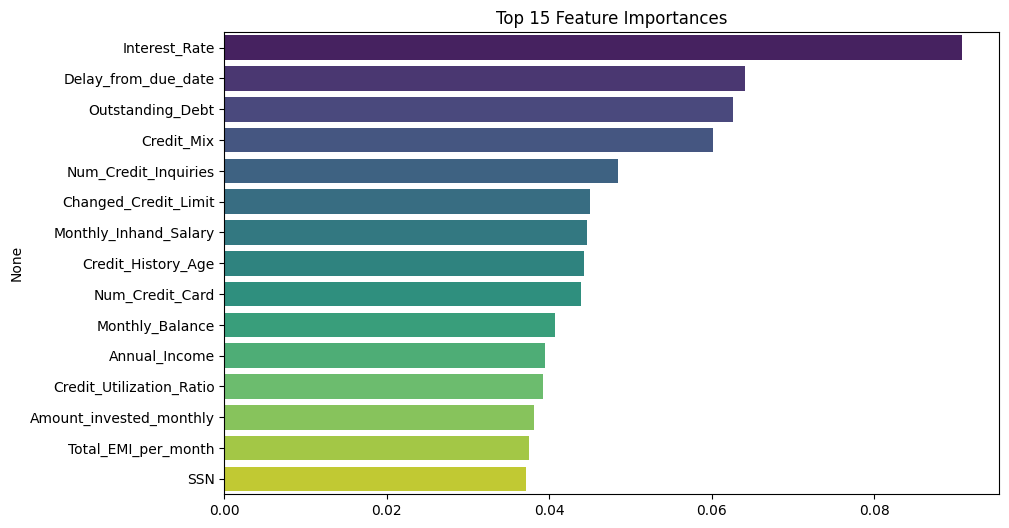

In [22]:
# Feature Importance Graph
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices][:15], y=X.columns[indices][:15], palette="viridis")
plt.title("Top 15 Feature Importances")
plt.show()

In [23]:

# Final prediction on test data
test_preds = model.predict(test_features)
print("\nSample Predictions on Test Data:", test_preds[:10])



Sample Predictions on Test Data: [2 2 2 2 2 2 2 2 2 2]
